<a href="https://colab.research.google.com/github/BonganiDS/CapitalOne/blob/master/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
import seaborn as sns 

In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=89b7d7ca42f59f6b29a368296f58a5a0a531c1d66b58a3cd7186e2f600ab4f2c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
df_data = pd.read_csv('churn2.csv')

In [ ]:
df_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
Dropping irrelevant columns that are just identifiers

In [ ]:
df_data.drop('CustomerId',axis=1,inplace=True)
df_data.drop('RowNumber', axis=1, inplace=True)
df_data.drop('Surname', axis=1, inplace=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df_data.groupby('Gender').Exited.mean()

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [ ]:
df_plot = df_data.groupby('Gender').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Gender'],
        y=df_plot['Exited'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_plot = df_data.groupby('Geography').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Geography'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['light grey', 'blue', 'grey'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Country',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [ ]:
df_plot = df_data.groupby('Tenure').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['Tenure'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=10),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure v. Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
df_plot = df_data.groupby('Age').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['Age'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=10),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Age"},
        title='Age v. Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
df_plot = df_data.groupby('CreditScore').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['CreditScore'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Credit Score"},
        title='Credit Score v. Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.NumOfProducts.describe()


count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [ ]:
df_plot = df_data.groupby('Balance').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['Balance'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Balance"},
        title='Balance v. Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.HasCrCard.describe()

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

In [ ]:
df_plot = df_data.groupby('HasCrCard').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['HasCrCard'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Credit Card Y/N',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [ ]:
df_plot = df_data.groupby('IsActiveMember').Exited.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['IsActiveMember'],
        y=df_plot['Exited'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='isActiveMember Y/N',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_data.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
df_plot = df_data.groupby('EstimatedSalary').Exited.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['EstimatedSalary'],
        y=df_plot['Exited'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Salary"},
        title='Salary v. Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
palette_features = ['#E68753', '#409996']

AttributeError: ignored

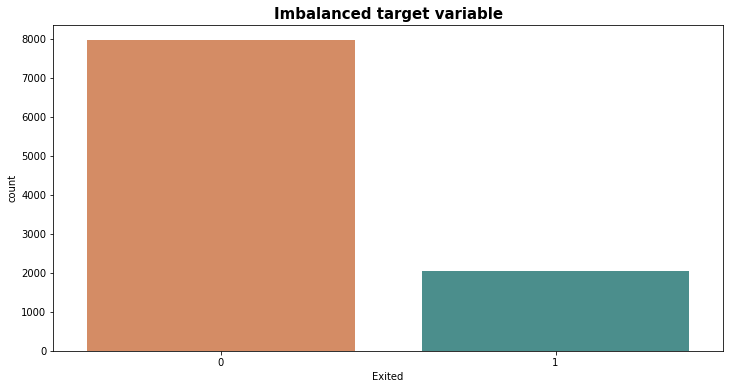

In [ ]:
#Exited = target variable
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=df_data['Exited'], data=df_data, palette=palette_features)

#add labels to each bar
abs_values = df_data['Exited'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

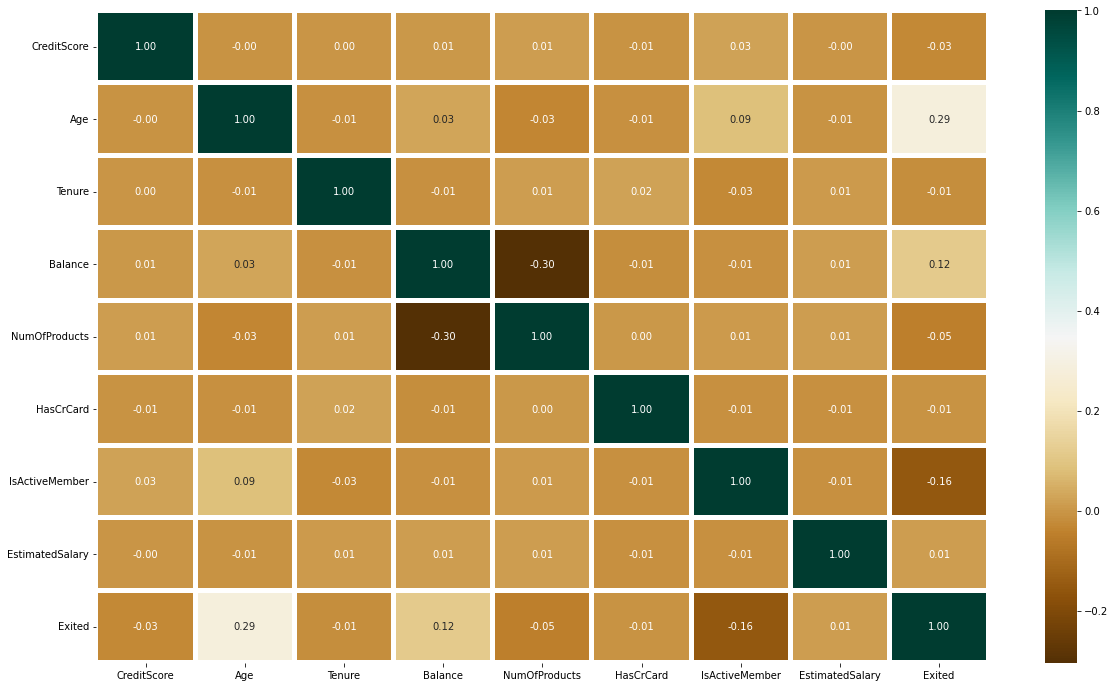

In [ ]:
corr = df_data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()


Dealing with categorical data

In [ ]:
from sklearn import preprocessing
from numpy import array

In [ ]:
cat_columns = [cname for cname in df_data.columns
                        if df_data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df_data[col] = encoder.fit_transform(df_data[col])
    
df_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


balancing the exits

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
#balancing the target variable
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']
columns = [c for c in columns if c not in ['Exited']]
y = df_data['Exited'] #prior target variable
X = df_data[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {Counter(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - df_data.shape[0], 'new random picked points')

Imbalanced target class: Counter({0: 7963, 1: 2037})

Balanced target class: Counter({1: 7963, 0: 7963})

5926 new random picked points


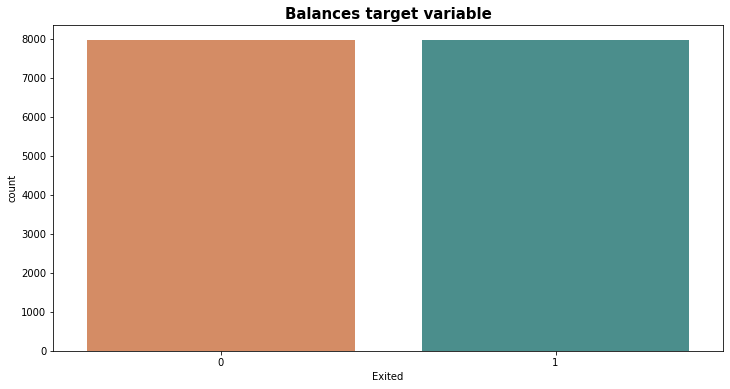

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Balances target variable", fontsize = 15, fontweight = 'bold', fontname='Helvetica', ha = 'center')
ax = sns.countplot(x=y_train_balanced,data=df_data,palette=palette_features)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced,y_train_balanced,test_size=0.2, random_state=1)#80% of training data, 20% of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12740, 9), (3186, 9), (12740,), (3186,))

**K-Nearest Neighbors**

We will go step by step by all possible parameters of KNeighborsClassifier function:

n_neighbors: number of neighbors which we will use to classify new sample/row/observation
metric: metric to compute distance between new sample and its neighbors (Euclidian or Manhattan distance)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(X_train,y_train)
y_pred_knnc = knnc.predict(X_test)

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of K-NN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Recall score of K-NN: {:.2f}".format(recall_score(y_pred_knnc,y_test,average='macro',zero_division=True)))
print("Precision score of K-NN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of K-NN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1534
           1       0.72      0.74      0.73      1652

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

Accuracy score of K-NN : 0.72
Recall score of K-NN: 0.72
Precision score of K-NN: 0.74
F1 score of K-NN: 0.73


[[1064  470]
 [ 432 1220]]


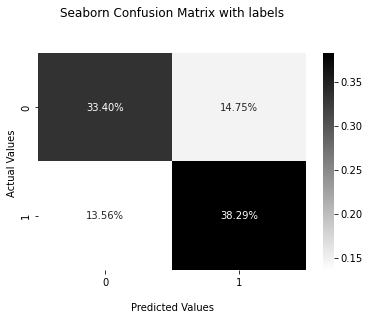

In [ ]:
#plotting Confusion Matrix
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#hyperparameter tuning
params = {'n_neighbors': list(range(1,20)), 'metric': ["euclidean", "manhattan"]}
knnc_tuned = KNeighborsClassifier()
grid_search_cv = GridSearchCV(knnc_tuned, param_grid = params, cv=10) #verbose=True
best_knnc_model = grid_search_cv.fit(X_train, y_train)
# returns the best model
print(best_knnc_model.best_estimator_)
# the best parameters
print(best_knnc_model.best_params_)
# accuracy obtained by the model
knn_accuracy = best_knnc_model.best_score_
print('The accuracy score with using the tuned KNN is: ', knn_accuracy)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)
{'metric': 'manhattan', 'n_neighbors': 1}
The accuracy score with using the tuned KNN is:  0.8562794348508633


In [ ]:
feature_scores = pd.Series(knnc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

AttributeError: ignored

**Random forest**

We will go step by step by all possible parameters of Random forest function:

n_estimators: total number of trees in forest (1 or 2 trees doesn't make sense, we need a huge forest 🌲🌲🌲🌲🌲 - keep in mind that higher number of trees increases performance but makes code slower)
class_weight: assign weights to classes (0,1). This parameter should be used, if the dataset was imbalanced.
min_samples_leaf: min number of samples of each end node(leaf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#implementing Random forest
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Recall score of Random forest : {:.2f}".format(recall_score(y_pred_rfc,y_test,average='macro',zero_division=True)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1534
           1       0.92      0.98      0.95      1652

    accuracy                           0.95      3186
   macro avg       0.95      0.94      0.94      3186
weighted avg       0.95      0.95      0.94      3186

Accuracy score of Random forest : 0.95
Recall score of Random forest : 0.95
Precision score of Random forest : 0.98
F1 score of Random forest : 0.95


[[1390  144]
 [  31 1621]]


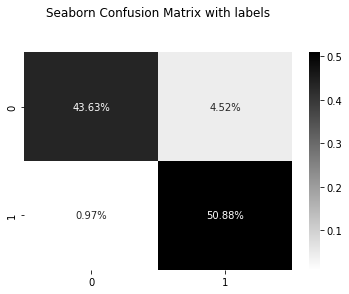

In [ ]:
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cf_matrix_rfc)

ax = sns.heatmap(cf_matrix_rfc/np.sum(cf_matrix_rfc),annot=True,fmt='.2%', cmap='binary')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
#hyperparameter tuning
params = {'min_samples_leaf' : list(range(25, 100)), 'min_samples_split': [2, 3, 4]}
rfc_tuned = RandomForestClassifier()
grid_search_cv = GridSearchCV(rfc_tuned, param_grid=params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_
grid_search_cv.best_params_
# accuracy obtained by the model
rf_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Random Forest is :',rf_accuracy)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
The accuracy score with using the tuned Random Forest is : 0.7940346945557573


In [ ]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Age                0.252285
EstimatedSalary    0.154108
Balance            0.148636
NumOfProducts      0.143550
CreditScore        0.141925
Tenure             0.081091
Geography          0.039655
Gender             0.019973
HasCrCard          0.018778
dtype: float64

ValueError: ignored

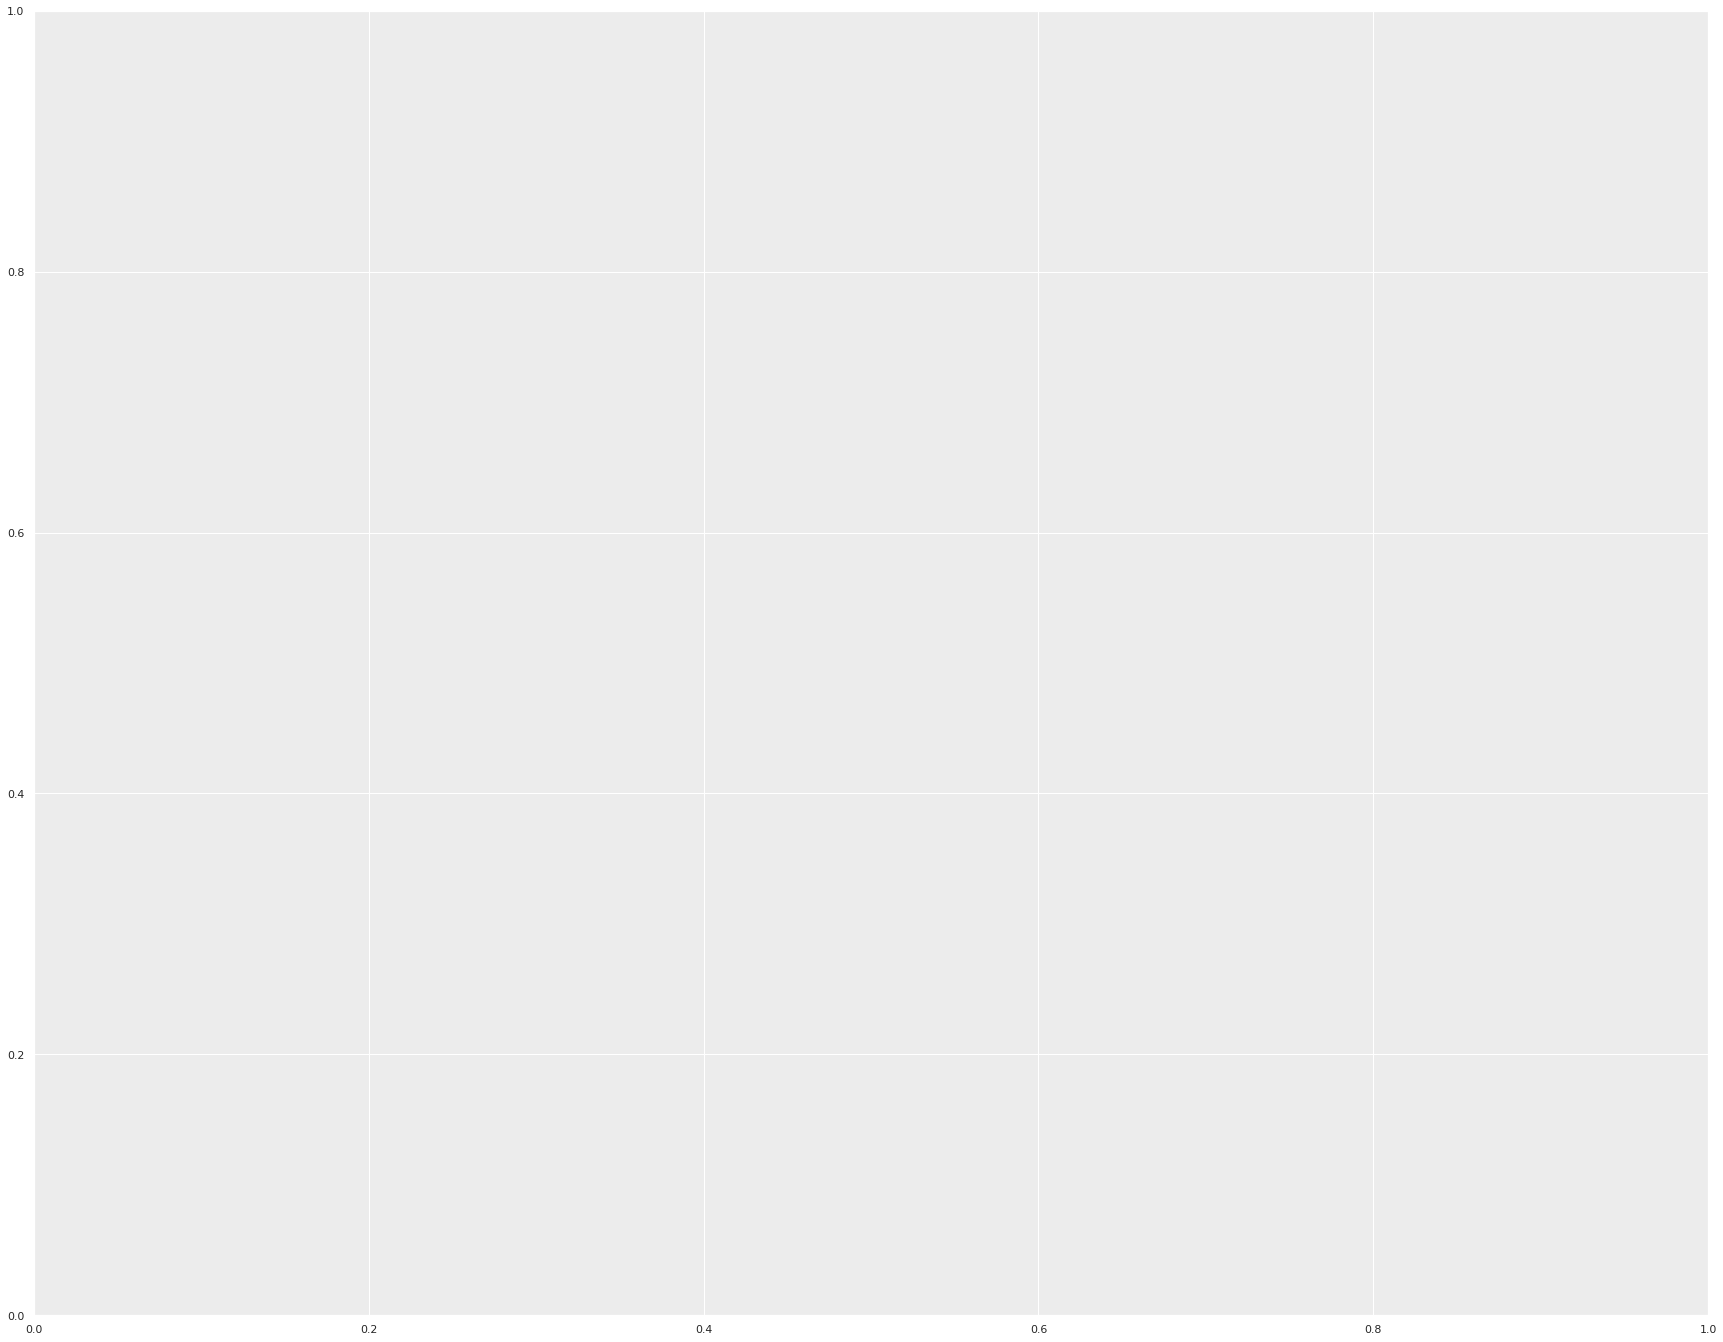

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(
    x=feature_scores ,
    y=feature_scores.index,
    data=df_data)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

**Logistic regression**

Logistic regression has 5 prerequisties:



1. Linearity
2. No Endogeneity
3. Normality and Homoscadesticity.
4. No Autocorrelation.
5. No Multicollinearity

We will go step by step by all possible parameters of LogisticRegression function:



1. penalty: imposes a penalty for too many variables
2. solver: it's a linear classification that supports logistic regression
3. max_iter: number of maximum iterations


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#implementing logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Recall score of Logistic Regression : {:.2f}".format(recall_score(y_pred_lr,y_test,average='macro',zero_division=True)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1534
           1       0.69      0.66      0.67      1652

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.67      0.67      0.67      3186

Accuracy score of Logistic Regression : 0.67
Recall score of Logistic Regression : 0.67
Precision score of Logistic Regression : 0.66
F1 score of Logistic Regression : 0.67


[[1039  495]
 [ 560 1092]]


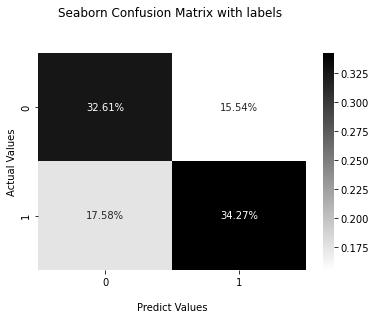

In [ ]:
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print (cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%',cmap='binary')

ax.set_title('Seaborn Confusion Matrix with labels \n\n');
ax.set_xlabel('\nPredict Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#hyperparameter tuning of logistic regression (parameters must be of data type list)
params = [{'penalty' : ['l2'], 'solver' : ['liblinear'],
    'max_iter' : [1000, 2500, 5000]
    }]
lr_tuned = LogisticRegression()
grid_search_cv = GridSearchCV(lr_tuned, param_grid = params, verbose=True, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_
grid_search_cv.best_params_
# accuracy obtained by the model
lr_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Logistic regression is :',lr_accuracy)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The accuracy score with using the tuned Logistic regression is : 0.6604395604395604


XG Boost Classifier

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))


Accuracy of XGB classifier on training set: 0.82
Accuracy of XGB classifier on test set: 0.80


In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1534
           1       0.82      0.79      0.80      1652

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [ ]:
from xgboost import plot_tree

##set up the parameters
fig, ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model, ax=ax)

In [1]:
from xgboost import plot_importance

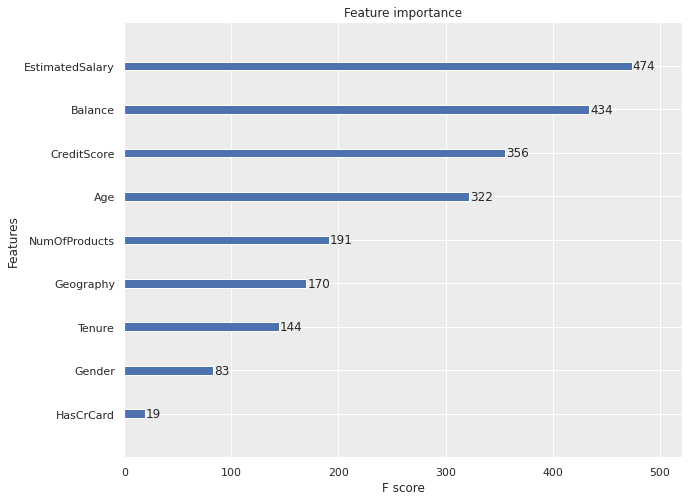

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [ ]:
accuracies = {"KNN Accuracy":knn_accuracy, "Random Forest Accuracy":accuracy_score(y_pred_rfc,y_test), "Logistic Regression Accuracy":accuracy_score(y_pred_lr, y_test),"XG Boost Accuracy":accuracy_score(y_pred_xgb, y_test)}
print("The best score has the model: ", max(accuracies, key=accuracies.get))

The best score has the model:  Random Forest Accuracy


AttributeError: ignored

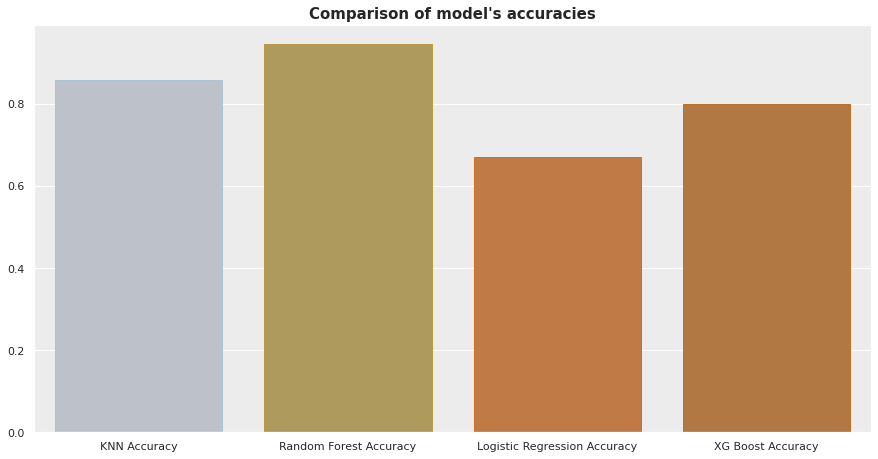

In [ ]:
olympic_palette = ['#BBC2CC', '#BBA14F', '#D37731','#C37731']
olympic_edge_colors = ['#AEC3D1', '#BD9A3B', '#D66D20', '#C66D20']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_palette,  edgecolor = olympic_edge_colors)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', fontname = 'Helvetica', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()